### Dies ist eine Prognose für die Anzahl der Studierenden.
Mit Markdown lassen sich nach belieben Texte einbinden.

In [10]:
import pandas as pd 
import numpy as np 
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

#### Methoden

Es folgen einige Methoden zur Vorhersage.

In [2]:
def linear_regression (x_data, y_data):
    """ Linear regression via least square method. 
    Returns slope and intercept for a linear fit 
    of given x and y data. 
    """
    x_mean = sum(x_data) / np.prod(x_data.shape)
    y_mean = sum(y_data) / np.prod(y_data.shape)

    sxx = 0
    syy = 0
    sxy = 0

    for i in range(np.prod(x_data.shape)):
        sxx = sxx + (x_mean - x_data[i])**2
        syy = syy + (y_mean - y_data[i])**2
        sxy = sxy + (x_mean - x_data[i]) * (y_mean - y_data[i])

    mx = sxy / sxx
    my = sxy / syy

    bx = y_mean - mx * x_mean
    by = y_mean - my * x_mean

    return mx, my, bx, by

def linear_function(m, x, b):
    """ A linear function of one variable x 
    with slope m and and intercept b. 
    """
    return m * x + b

def lin_predict(x, x_data, y_data):
    """ Predicts a value for a given data set
    with an linear realation of X and Y.
    """
    mx, my, bx, by = linear_regression(x_data, y_data)

    x_predict = []
    y_predict = []

    for i in x:
        x_predict.append(linear_function(mx, i, bx))
        y_predict.append(linear_function(my, i, by))
    
    return x_predict, y_predict

def normalize_minmax(x, x_min, x_max, min_r, max_r):
    """ Normalizing and scaling given data
    in an array x to the range of min_r 
    to max_r. x_max and x_min are maximum
    and minium of the total data x and do
    not need to be in x itself. 
    """
    x_s = ((i - x_min)/(x_max - x_min) for i in x)
    return [i * (max_r - min_r) + min_r for i in x_s]

def de_normalize_minmax(x_scale, x, x_min, x_max, min_r, max_r):
    """ Transforms a min-max normalized and 
    scaled vector back to its un-normalized
    form.
    """
    x_t = (((i - min_r)/(max_r - min_r)) for i in x_scale)
    return [(i*(x_max - x_min) + x_min) for i in x_t]

In [3]:
# Read the data form the input file and name the columns. 
student_data = pd.read_csv("student_data.txt", sep=" ", header=None)
student_data.columns = ["semester", "year", "all", "all_male", "all_female", 
                        "all_ger", "male_ger", "female_ger", 
                        "all_not_ger", "male_not_ger", "female_not_ger"]

In [6]:
# Print head of data to check if the data is valid.
student_data.head()

,semester,year,all,all_male,all_female,all_ger,male_ger,female_ger,all_not_ger,male_not_ger,female_not_ger
0,WS,1998,233116,127464,105652,214834,118148,96686,18282,9316,8966
1,WS,1999,210774,114068,96706,192144,104791,87353,18630,9277,9353
2,WS,2000,213300,113791,99509,192899,103873,89026,20401,9918,10483
3,WS,2001,219820,115856,103964,196735,104891,91844,23085,10965,12120
4,WS,2002,230434,119318,111116,204564,107418,97146,25870,11900,13970


In [5]:
# Quick statistical analysis 
student_data.describe()

,year,all,all_male,all_female,all_ger,male_ger,female_ger,all_not_ger,male_not_ger,female_not_ger
count,20.00000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2007.50000,285252.65000,147555.750000,137696.900000,254762.15000,133156.050000,121606.100000,30490.500000,14399.700000,16090.800000
std,5.91608,60898.44532,30313.749713,30739.332202,52908.91437,26180.464262,26838.557444,8626.701629,4455.022962,4257.667357
min,1998.00000,210774.00000,113791.000000,96706.000000,192144.00000,103873.000000,87353.000000,18282.000000,9277.000000,8966.000000
25%,2002.75000,241896.25000,126998.500000,116760.500000,216185.50000,114403.000000,101555.250000,26663.500000,12117.500000,14489.000000
50%,2007.50000,258368.50000,132217.500000,126151.000000,230317.00000,119692.000000,110625.000000,28667.000000,12624.500000,15845.000000
75%,2012.25000,338551.75000,175000.250000,163551.500000,304933.50000,158939.500000,145994.000000,33618.250000,16060.750000,17557.500000
max,2017.00000,388893.00000,198267.000000,190626.000000,338746.00000,173136.000000,165610.000000,50147.000000,25131.000000,25016.000000


In [7]:
# Calculate the number of missing data values in each column.
student_data_missing = student_data.apply(lambda x: sum(x.isnull()), axis=0)

for i in student_data_missing:
    if student_data_missing[i] != 0:
        print(student_data_missing[i], "Values are Missing in column:", i)

In [8]:
# Convert pandas dataframe columns into numpy arrays
all_students_vec = student_data["all"].to_numpy()
year_vec = student_data["year"].to_numpy()

# Fitting with linear regression
mx, my, bx, by = linear_regression(year_vec, all_students_vec)

lin_reg_x = []
lin_reg_y = []

for x in year_vec:
    lin_reg_x.append(linear_function(mx, x, bx))

for y in all_students_vec:
    lin_reg_y.append(linear_function(my, y, by))

In [9]:
# Prediction of the number of students in the future with linear regresssion.
prediction_year = [i for i in range(2017,2030)]
predictions = lin_predict(prediction_year, year_vec, all_students_vec)[0]

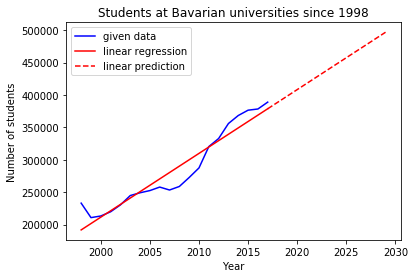

In [11]:
# Plot the evolution of the number of students over time.
plt.plot(year_vec, all_students_vec, "-b", label="given data")
plt.plot(year_vec, lin_reg_x, "-r", label="linear regression")
plt.plot(prediction_year, predictions, "--r", label="linear prediction")

plt.title("Students at Bavarian universities since 1998")
plt.xlabel("Year")
plt.ylabel("Number of students")
plt.legend()
plt.show()

Die Abbildung zeigt die Entwicklung der Studierendenzahlen in blau und die Prognose in rot.